Fpga =  0.7833333333333333
Fa  0.86
Fpga  2.4


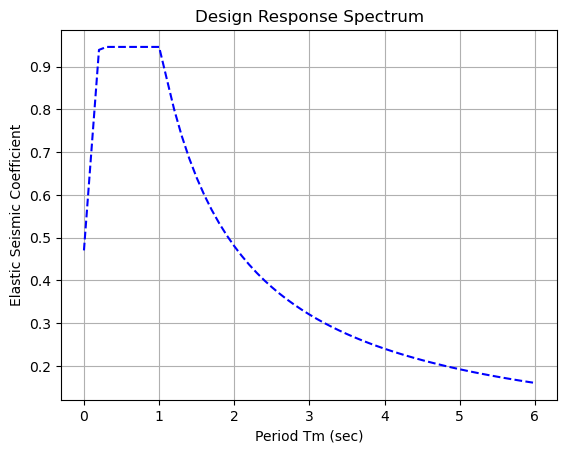

In [3]:
import bsdspy

pga = 0.6
ss = 1.1
s1 = 0.4

site_value = bsdspy.SeismicSiteFactor("III",pga,ss,s1)
fpga = site_value.interpolate_site_factor()
fa = site_value.get_site_factor_fa()
fv = site_value.get_site_factor_fv()

print("Fpga = ", fpga)
print("Fa ", fa)
print("Fpga ", fv)

site_response = bsdspy.SeismicDesignResponse(pga, fpga, ss, s1, fa, fv)
site_response.plot_design_response_spectrum()